In [2]:
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

In [7]:
data_train = pd.read_csv('training_mush.csv')
data_X_test = pd.read_csv('testing_mush.csv')
data_y_test = pd.read_csv('testing_y_mush.csv')

data_train.shape, data_X_test.shape, data_y_test.shape

((6093, 23), (2031, 22), (2031, 1))

In [62]:
y_train = data_train['class']
X_train = data_train.drop(['class'], axis=1)

y_test = data_y_test
X_test = data_X_test

In [46]:
parameters = {'n_estimators': range(10, 51, 10), 'max_depth': range(1, 13, 2), 'min_samples_split': range(2, 10, 2),
              'min_samples_leaf': range(1, 8)}
grid = GridSearchCV(RandomForestClassifier(random_state=0), param_grid=parameters, cv=3, n_jobs=1, verbose=1)
grid.fit(X_train, y_train)

Fitting 3 folds for each of 840 candidates, totalling 2520 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0), n_jobs=1,
             param_grid={'max_depth': range(1, 13, 2),
                         'min_samples_leaf': range(1, 8),
                         'min_samples_split': range(2, 10, 2),
                         'n_estimators': range(10, 51, 10)},
             verbose=1)

In [47]:
best_params = grid.best_params_
best_params

{'max_depth': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 10}

In [58]:
best_model = grid.best_estimator_
best_model.score(X_train, y_train)

1.0

In [59]:
pd.Series(best_model.predict(X_test)).value_counts()

0    1055
1     976
Name: count, dtype: int64

In [63]:
importance = pd.DataFrame(data={"zaza": best_model.feature_importances_, "nigga": list(X)}).sort_values(by="zaza",
                                                                                                        ascending=False)
importance

,zaza,nigga
4,0.188376,odor
8,0.103861,gill-color
10,0.103793,stalk-root
19,0.083564,spore-print-color
6,0.080840,gill-spacing
18,0.070726,ring-type
3,0.070109,bruises
7,0.068461,gill-size
12,0.048296,stalk-surface-below-ring
20,0.043783,population


In [64]:
best_model.score(X_test, y_test)

1.0

In [71]:
zaza = confusion_matrix(y_test, best_model.predict(X_test))

array([[1055,    0],
       [   0,  976]], dtype=int64)

In [75]:
zaza = confusion_matrix(y_test, best_model.predict(X_test))
zaza

array([[1055,    0],
       [   0,  976]], dtype=int64)

<Axes: >

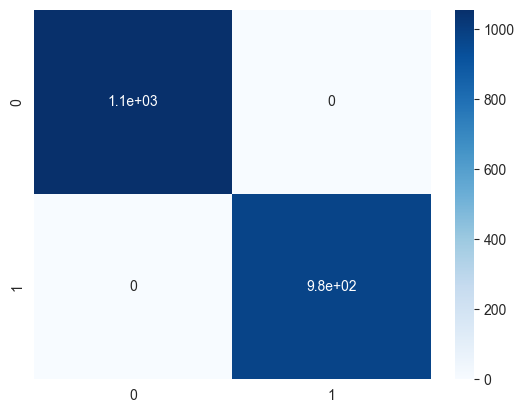

In [76]:
sns.heatmap(zaza, annot=True, cmap="Blues")